In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')

file_path = os.path.join('raw_data', 'ncaa_mens_march_madness_historical_results.csv')
team_game_df = pd.DataFrame()
march_madness_df = pd.read_csv(file_path)
march_madness_df.reset_index(inplace=True)
for winner_loser in ['winner', 'loser']:
    if winner_loser == 'winner':
        winner_df = march_madness_df.copy()
        final_columns = ['game_id', 'date', 'round', 'region', 'seed', 'team',
                         'score', 'opponent_seed', 'opponent', 'opponent_score', 'overtime']
        winner_df.columns = ['game_id', 'date', 'round', 'region', 'seed', 'team',
                             'score', 'opponent_seed', 'opponent', 'opponent_score', 'overtime']
    else:
        loser_df = march_madness_df.copy()
        loser_df.columns = ['game_id', 'date', 'round', 'region', 'opponent_seed', 'opponent',
                             'opponent_score', 'seed', 'team', 'score', 'overtime']
        loser_df = loser_df[final_columns]
team_game_df = winner_df.append(loser_df, ignore_index=True)
team_game_df = team_game_df.sort_values('game_id')
team_game_df.reset_index(drop=True, inplace=True)
team_game_df['score_diff'] = team_game_df['score'] - team_game_df['opponent_score']
team_game_df['seed_id'] = ''
for  index, row in team_game_df.iterrows():
    seed = team_game_df.loc[index]['seed']
    opponent_seed = team_game_df.loc[index]['opponent_seed']
    if seed < opponent_seed:
        seed_id = f'{seed}_{opponent_seed}_fav'
    elif seed > opponent_seed:
        seed_id = f'{opponent_seed}_{seed}_dog'
    else:
        seed_id = f'{seed}_{seed}'
    team_game_df.loc[index, 'seed_id'] = seed_id
    
team_game_df.head()

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,5_12_fav


In [3]:
# add wins column
win_loss = []

for  index, row in team_game_df.iterrows():
    if row["score"] > row["opponent_score"]:
        win_loss.append(1)
    else:
        win_loss.append(0)

team_game_df["win"] = win_loss
team_game_df.head()

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,seed_id,win
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1_16_fav,1
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,1_16_dog,0
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,4_13_fav,1
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,4_13_dog,0
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,5_12_fav,1


In [4]:
# remove play-in games
no_play_ins = team_game_df.loc[team_game_df["round"] != "Opening Round", :]
no_play_ins.head()

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,seed_id,win
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1_16_fav,1
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,1_16_dog,0
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,4_13_fav,1
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,4_13_dog,0
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,5_12_fav,1


In [5]:
# filter data by seed and store
seed_count = 128
avg_wins_by_seed = []
avg_pt_spread_by_seed = []
wins_by_round_by_seed = []

def get_avg_wins(seed):
    games = no_play_ins.loc[no_play_ins["seed"] == seed, :]
    wins = games["win"].sum()
    avg_wins = wins/seed_count
    return avg_wins

def get_avg_pt_spread(seed):
    games = no_play_ins.loc[no_play_ins["seed"] == seed, :]
    avg_pt_spread = games["score_diff"].mean()
    return avg_pt_spread

def get_round_by_round(seed):
    games = no_play_ins.loc[no_play_ins["seed"] == seed, :]
    games_by_round = games.groupby("round")
    wins_by_round = games_by_round["win"].sum()
    return wins_by_round

for seed in range(1,17):
    avg_wins = get_avg_wins(seed)
    avg_wins_by_seed.append(avg_wins)
    avg_pt_spread = get_avg_pt_spread(seed)
    avg_pt_spread_by_seed.append(avg_pt_spread)
    wins_by_round = get_round_by_round(seed)
    wins_by_round_by_seed.append(wins_by_round)

seed_summaries = pd.DataFrame({
    "Seed":range(1,17),
    "Average Wins":avg_wins_by_seed,
    "Average Point Spread": avg_pt_spread_by_seed,
    "Wins by Round": wins_by_round_by_seed
})

seed_summaries

,Average Point Spread,Average Wins,Seed,Wins by Round
0,11.392193,3.351562,1,round Elite Eight 52 National Ch...
1,7.109302,2.398438,2,round Elite Eight 28 National Ch...
2,4.960452,1.796875,3,round Elite Eight 14 National Ch...
3,3.313846,1.546875,4,round Elite Eight 13 National Ch...
4,0.892593,1.109375,5,round Elite Eight 6 National Cha...
5,0.335793,1.125000,6,round Elite Eight 3 National Cha...
6,-0.585062,0.890625,7,round Elite Eight 2 National Cha...
7,-3.281818,0.726562,8,round Elite Eight 5 National Cha...
8,-4.220000,0.562500,9,round Elite Eight 1 National Semif...
9,-3.028571,0.640625,10,round Elite Eight 1 National Semif...


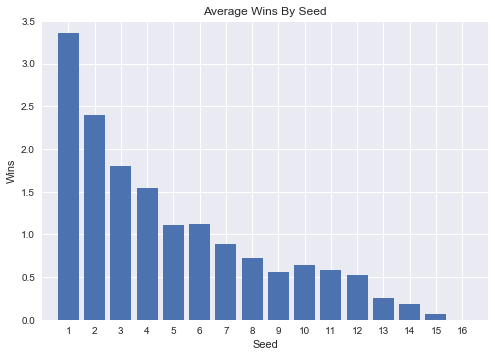

In [6]:
plt.bar(seed_summaries["Seed"], seed_summaries["Average Wins"])
tick_locations = seed_summaries["Seed"]
plt.title("Average Wins By Seed")
plt.ylabel("Wins")
plt.xlabel("Seed")
plt.xticks(tick_locations, seed_summaries["Seed"])
plt.ylim(0,3.5)
plt.xlim(0,17)
plt.show()

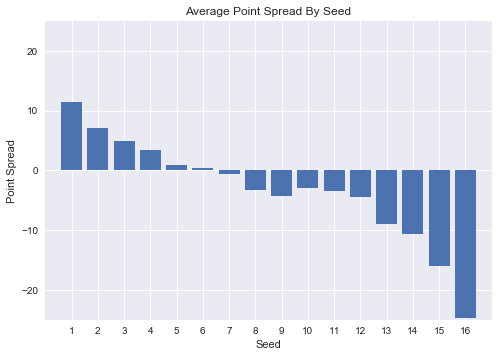

In [7]:
plt.bar(seed_summaries["Seed"], seed_summaries["Average Point Spread"])
tick_locations = seed_summaries["Seed"]
plt.title("Average Point Spread By Seed")
plt.ylabel("Point Spread")
plt.xlabel("Seed")
plt.xticks(tick_locations, seed_summaries["Seed"])
plt.ylim(-25,25)
plt.xlim(0,17)
plt.show()

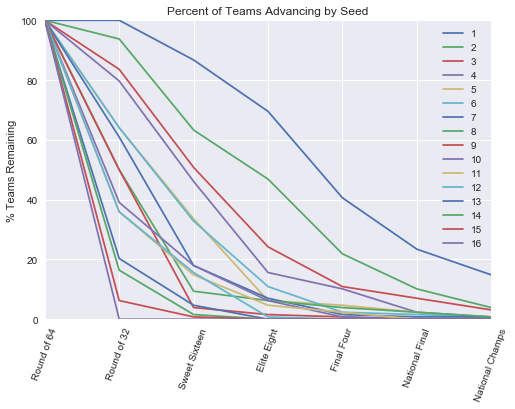

In [9]:
# plot teams remaining by round for each seed
# make this a function

teams_remaining_by_seed = []

for seed in seed_summaries["Wins by Round"]:
    teams_remaining = []
    tourney_start = 100
    try:
        round_of_32 = (seed["Round of 64"]/seed_count)*100
    except KeyError:
        round_of_32 = 0
    try:
        sweet_sixteen = (seed["Round of 32"]/seed_count)*100
    except KeyError:
        sweet_sixteen = 0
    try:
        elite_eight = (seed["Sweet Sixteen"]/seed_count)*100
    except KeyError:
        elite_eight = 0
    try:
        final_four = (seed["Elite Eight"]/seed_count)*100
    except KeyError:
        final_four = 0
    try:
        national_final = (seed["National Semifinals"]/seed_count)*100
    except KeyError:
        national_final = 0
    try:
        national_champ = (seed["National Championship"]/seed_count)*100
    except KeyError:
        national_champ = 0
    
    teams_remaining.append(tourney_start)
    teams_remaining.append(round_of_32)
    teams_remaining.append(sweet_sixteen)
    teams_remaining.append(elite_eight)
    teams_remaining.append(final_four)
    teams_remaining.append(national_final)
    teams_remaining.append(national_champ)
    teams_remaining_by_seed.append(teams_remaining)

for seed in teams_remaining_by_seed:
    plt.plot(seed)
    
xticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four","National Final","National Champs"]
tick_locations = range(len(xticks))
plt.title("Percent of Teams Advancing by Seed")
plt.ylabel("% Teams Remaining")
plt.xticks(tick_locations, xticks, rotation=70)
plt.ylim(0,100)
plt.xlim(0,6)
plt.legend(range(1,17))
plt.show()